In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max.columns',None)

In [304]:
data = pd.read_csv("valid_set_one_hot_encoding.csv")
orig_train=pd.read_csv("orig_train.csv")

NO_OF_DEPENDENTS column change to HAS_DEPENDENTS column

In [305]:
data["HAS_DEPENDENTS"]=data["NO_OF_DEPENDENTS"].apply(lambda x: 0 if x == 0 else 1)
data=data.drop(columns=["NO_OF_DEPENDENTS"])

In [306]:
columns = data.columns.tolist()
columns.insert(1, columns.pop())
data=data[columns]
data

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100
0,65.0,0,1245.0,5.0,16.0,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.0,0,1380.0,5.0,16.0,8,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.0,0,1131.0,2.0,6.0,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0,1730.0,9.0,13.0,2,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,38.0,0,1189.0,5.0,16.0,1,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15004,31.0,0,1886.0,8.0,17.0,1,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15005,54.0,0,670.0,27.0,45.0,9,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
15006,45.0,0,4794.0,11.0,21.0,11,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15007,57.0,0,3733.6,11.0,21.0,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0

# Feature selection

We'll use some of the most popular feature selection techniques to determine which of the features that are in our dataset have a strong predictive potential in terms of feature FINALISED_LOAN

1. Let's start with Chi-square Test. This test is applicable for categorical variables. It evaluates whether the observed distribution of variables differs from the expected distribution. We'll use it for binary features (because we currently don't have any categorical features) in relation to the "FINALIZED_LOAN" target variable.

In [307]:
# Identify binary and continuous variables

# Assuming variables with a unique count of 2 are binary

binary_columns = [col for col in data.columns if data[col].nunique() == 2]

continuous_columns = [col for col in data.columns if col not in binary_columns]



# Separate the dataframe into binary and continuous dataframes

data_binary = data[binary_columns]

data_continuous = data[continuous_columns]



# Remove the target variable 'FINALIZED_LOAN' from continuous columns as it's our target

binary_columns.remove('FINALIZED_LOAN')



# Display the categorization

binary_columns, continuous_columns

(['HAS_DEPENDENTS',
  'CURRENT_ACCOUNT',
  'SALARY_ACCOUNT',
  'PRODUCT_B',
  'PRODUCT_C',
  'PRODUCT_E',
  'PRODUCT_F',
  'AREA_County capital',
  'AREA_Rural area',
  'AREA_Urban area',
  'RESIDENTIAL_PLACE_Living with family',
  'RESIDENTIAL_PLACE_Other',
  'RESIDENTIAL_PLACE_Owner with mortgage',
  'RESIDENTIAL_PLACE_Owner without mortgage',
  'RESIDENTIAL_PLACE_Rental',
  'EDUCATION_College',
  'EDUCATION_Highschool',
  'EDUCATION_Middle school',
  'EDUCATION_Missing',
  'EDUCATION_Other',
  'EDUCATION_Post secondary school',
  'EDUCATION_Post-graduate',
  'EDUCATION_Primary school',
  'EDUCATION_University',
  'EDUCATION_Vocational school',
  'MARITAL_STATUS_divorced',
  'MARITAL_STATUS_married',
  'MARITAL_STATUS_single',
  'MARITAL_STATUS_widow',
  'ECONOMIC_SECTOR_Accommodation and food service activities',
  'ECONOMIC_SECTOR_Agriculture, hunting and forestry',
  'ECONOMIC_SECTOR_Construction',
  'ECONOMIC_SECTOR_Education',
  'ECONOMIC_SECTOR_Electricity and gas',
  'ECONOMIC

In [308]:
# Preparing the data for Chi-square test

X_binary = data_binary.drop('FINALIZED_LOAN', axis=1)  # Features

y = data['FINALIZED_LOAN']  # Target



# Apply Chi-square test

chi_selector = SelectKBest(chi2, k='all')

chi_selector.fit(X_binary, y)



# Get the scores for each feature

chi_scores = pd.DataFrame({'Feature': X_binary.columns, 'Chi2 Score': chi_selector.scores_}).sort_values(by='Chi2 Score', ascending=False)


chi_scores

,Feature,Chi2 Score
10,RESIDENTIAL_PLACE_Living with family,253.594924
27,MARITAL_STATUS_single,234.200711
13,RESIDENTIAL_PLACE_Owner without mortgage,172.365385
2,SALARY_ACCOUNT,160.689517
4,PRODUCT_C,132.682056
...,...,...
53,EMPLOYEE_NO_between 251-500,0.116985
52,EMPLOYEE_NO_between 21-50,0.061385
34,ECONOMIC_SECTOR_Financial and insurance activi...,0.056848
30,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",0.049278


The Chi-square test results provide a score for each binary feature, reflecting how strongly each feature is associated with the target variable "FINALIZED_LOAN". Higher scores suggest a stronger association.

Top features based on Chi-square scores include:
* RESIDENTIAL_PLACE_Living with family
* MARITAL_STATUS_single
* RESIDENTIAL_PLACE_Owner without mortgage
* SALARY_ACCOUNT
* PRODUCT_C

2. Next, we'll perform the ANOVA F-test for continuous features to evaluate their relationship with the target variable. The ANOVA F-test results show the relationship between each continuous feature and the target variable "FINALIZED_LOAN". The F-value measures the degree of variance between group means (for each feature), with a higher value indicating a stronger association. The P-value assesses the significance of this association, with values below a typical threshold (e.g., 0.05) suggesting statistical significance.

In [309]:
# Prepare the data for ANOVA F-test

X_continuous = data_continuous

# Apply ANOVA F-test

f_values, p_values = f_classif(X_continuous, y)


# Combine the results into a dataframe

anova_scores = pd.DataFrame({'Feature': X_continuous.columns, 'F-value': f_values, 'P-value': p_values}).sort_values(by='F-value', ascending=False)


anova_scores

,Feature,F-value,P-value
4,LENGTH_RELATIONSHIP_WITH_CLIENT,5467.828269,0.000000e+00
2,WORK_SENIORITY,734.674372,5.348239e-158
0,AGE,478.880432,1.602682e-104
3,BUSINESS AGE,98.160256,4.541968e-23
1,INCOME,35.450449,2.674600e-09


Top continuous feature based on the ANOVA F-test is LENGTH_RELATIONSHIP_WITH_CLIENT

3. The feature importance scores from the Random Forest model indicate the relative importance of each feature in predicting the target variable "FINALIZED_LOAN".

In [310]:
# Prepare the data for the Random Forest model

X = data.drop('FINALIZED_LOAN', axis=1)  # All features excluding the target


# Initialize and fit the Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X, y)


# Get feature importances

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)


feature_importances.head(10)

,Feature,Importance
5,LENGTH_RELATIONSHIP_WITH_CLIENT,0.314396
2,INCOME,0.107586
0,AGE,0.096478
3,WORK_SENIORITY,0.064204
4,BUSINESS AGE,0.051044
6,CURRENT_ACCOUNT,0.017077
12,AREA_County capital,0.013263
9,PRODUCT_C,0.013220
28,EDUCATION_University,0.013126
18,RESIDENTIAL_PLACE_Owner without mortgage,0.013058


The top features with the highest importance scores are:
* LENGTH_RELATIONSHIP_WITH_CLIENT: This feature has the highest importance, emphasizing the significance of the client's relationship length with the finalization of a loan.
* INCOME: The income of the individual also plays a crucial role in the prediction, highlighting its importance in the decision-making process for loan finalization.
* AGE: The age of the individual is another important predictor, which may reflect financial stability or reliability.
* WORK_SENIORITY and BUSINESS AGE: These features related to work experience and business longevity also contribute significantly to the prediction.

4. Now let's compute GINI for each feature

In [311]:
def gini_binary(target_counts):
    total = sum(target_counts)
    sum_squares = sum((n / total) ** 2 for n in target_counts)
    return 1 - sum_squares

gini_indices = {}

# For binary features
for column in binary_columns:
    counts = data.groupby(column)['FINALIZED_LOAN'].value_counts().unstack(fill_value=0)
    gini_index = 0
    for _, row in counts.iterrows():
        gini_index += (row.sum() / data.shape[0]) * gini_binary(row.values)
    gini_indices[column] = gini_index

# For continuous features (using median as a simple split point)
for column in continuous_columns:
    median = data[column].median()
    below_median = data[data[column] <= median]['FINALIZED_LOAN'].value_counts()
    above_median = data[data[column] > median]['FINALIZED_LOAN'].value_counts()
    gini_below = gini_binary(below_median.values)
    gini_above = gini_binary(above_median.values)
    weighted_gini = (below_median.sum() / data.shape[0]) * gini_below + (above_median.sum() / data.shape[0]) * gini_above
    gini_indices[column] = weighted_gini
    
# Convert the Gini indices into a sorted DataFrame for better readability

gini_df = pd.DataFrame(list(gini_indices.items()), columns=['Feature', 'Gini Index']).sort_values(by='Gini Index')


gini_df

,Feature,Gini Index
60,LENGTH_RELATIONSHIP_WITH_CLIENT,0.201772
10,RESIDENTIAL_PLACE_Living with family,0.266958
56,AGE,0.267032
13,RESIDENTIAL_PLACE_Owner without mortgage,0.267071
27,MARITAL_STATUS_single,0.267777
...,...,...
53,EMPLOYEE_NO_between 251-500,0.274253
52,EMPLOYEE_NO_between 21-50,0.274254
34,ECONOMIC_SECTOR_Financial and insurance activi...,0.274254
30,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",0.274254


Let's group age into the groups of 10 year bin

In [312]:
bins = [20, 30, 40, 50, 60, float('inf')]  # Ending with float('inf') to cover 60+
labels = ['20-30', '30-40', '40-50', '50-60', '60+']
data['Age Group'] = pd.cut(data['AGE'], bins=bins, labels=labels, right=False)

In [313]:
corr = data.corr()
corr[corr>0.3]

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100
AGE,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.548541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.621098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.698797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HAS_DEPENDENTS,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INCOME,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WORK_SENIORITY,NaN,NaN,NaN,1.000000,0.432188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUSINESS AGE,NaN,NaN,NaN,0.432188,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMPLOYEE_NO_between 11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
EMPLOYEE_NO_between 21-50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
EMPLOYEE_NO_between 251-500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [314]:
#Let's now check rows, where both employee_no_missing, economic_sector_missing and see the age of those people

df_emp_eco_missing=data[(data['EMPLOYEE_NO_Missing']==1)& (data['ECONOMIC_SECTOR_Missing']==1)]

df_emp_eco_missing['Age Category'] = df_emp_eco_missing['AGE'].apply(lambda x: 'Over 60' if x > 60 else 'Under or Equal to 60')

# Step 2: Group by the new 'Age Category' column
age_group = df_emp_eco_missing.groupby(['Age Category'])

# Step 3: Count the number of rows in each age group
age_group_counts = age_group.size()

# Step 4: Calculate percentages
age_group_percentages = (age_group_counts / df_emp_eco_missing.shape[0]) * 100

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': age_group_percentages
})
print(summary_df)

                      Count  Percentage
Age Category                           
Over 60                2437   73.073463
Under or Equal to 60    898   26.926537


C:\Users\jakub\AppData\Local\Temp\ipykernel_9700\1459107003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_eco_missing['Age Category'] = df_emp_eco_missing['AGE'].apply(lambda x: 'Over 60' if x > 60 else 'Under or Equal to 60')


As we could see in our correlation matrix, the correlation between three variables: age, economic_sector and employee_no is pretty strong. We can clearly see that over 73% of people in this group are the older ones. Let's change a little bit age border and set it as a value of 50.


In [315]:
df_emp_eco_missing['Age Category2'] = df_emp_eco_missing['AGE'].apply(lambda x: 'Over 50' if x > 50 else 'Under or Equal to 50')

# Step 2: Group by the new 'Age Category' column
age_group2 = df_emp_eco_missing.groupby(['Age Category2'])

# Step 3: Count the number of rows in each age group
age_group_counts2 = age_group2.size()

# Step 4: Calculate percentages
age_group_percentages2 = (age_group_counts2 / df_emp_eco_missing.shape[0]) * 100

# Creating a summary DataFrame
summary_df2 = pd.DataFrame({
    'Count': age_group_counts2,
    'Percentage': age_group_percentages2
})
summary_df2

C:\Users\jakub\AppData\Local\Temp\ipykernel_9700\99396407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_eco_missing['Age Category2'] = df_emp_eco_missing['AGE'].apply(lambda x: 'Over 50' if x > 50 else 'Under or Equal to 50')


,Count,Percentage
Age Category2,,
Over 50,3117,93.463268
Under or Equal to 50,218,6.536732


We can clearly see much stronger disproportion of distribution of considered age.

In [316]:
df_emp_eco_missing[(df_emp_eco_missing["WORK_SENIORITY"]==5) & (df_emp_eco_missing["BUSINESS AGE"]==16)]

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100,Age Group,Age Category,Age Category2
0,65.0,0,1245.0,5.0,16.0,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Over 60,Over 50
1,64.0,0,1380.0,5.0,16.0,8,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Over 60,Over 50
4,38.0,0,1189.0,5.0,16.0,1,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-40,Under or Equal to 60,Under or Equal to 50
14,63.0,0,984.0,5.0,16.0,12,1,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Over 60,Over 50
18,67.0,0,1039.0,5.0,16.0,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Over 60,Over 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14979,65.0,0,899.0,5.0,16.0,2,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Over 60,Over 50
14988,63.0,0,982.0,5.0,16.0,11,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+,Over 60,Over 50
14989,64.0,0,1146.0,5.0,16.0,12,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

All of the clients have the same work_seniority and business age. This probably mean that they are in the same company. Another interesting column is Residential_Place_Owner_without_mortgage. Let's see the distribution of age in this column to see if there are some correlations between those two columns

In [317]:
# Step 2: Group by 'RESIDENTIAL_PLACE_Owner' and 'Age Group'
grouped = df_emp_eco_missing.groupby(['RESIDENTIAL_PLACE_Owner without mortgage', 'Age Group'])

# Step 3: Calculate the count of each group
group_counts = grouped.size().reset_index(name='Count')

# Step 4: Calculate the percentage of each group relative to the total count of the corresponding 'RESIDENTIAL_PLACE_Owner' category
total_count = df_emp_eco_missing.shape[0]
group_counts['Percentage of Total'] = (group_counts['Count'] / total_count) * 100
group_counts

,RESIDENTIAL_PLACE_Owner without mortgage,Age Group,Count,Percentage of Total
0,0.0,20-30,49,1.469265
1,0.0,30-40,46,1.379310
2,0.0,40-50,17,0.509745
3,0.0,50-60,68,2.038981
4,0.0,60+,305,9.145427
5,1.0,20-30,8,0.239880
6,1.0,30-40,35,1.049475
7,1.0,40-50,54,1.619190
8,1.0,50-60,431,12.923538
9,1.0,60+,2322,69.625187


We can see that almost over 80% of the older people are owners without mortgage, which is quite intuitive.
Let's now take the other people in this group and see what is their Residential status. Most of them Live with their families

In [318]:
grouped_2 = df_emp_eco_missing[df_emp_eco_missing['RESIDENTIAL_PLACE_Living with family']==1].groupby(['Age Group'])

# Step 3: Calculate the count of each group
group_counts_2 = grouped_2.size().reset_index(name='Count')

# Step 4: Calculate the percentage of each group relative to the total count of the corresponding 'RESIDENTIAL_PLACE_Owner' category
group_counts_2['Percentage of Total'] = (group_counts_2['Count'] / total_count) * 100
group_counts_2

,Age Group,Count,Percentage of Total
0,20-30,36,1.079460
1,30-40,19,0.569715
2,40-50,11,0.329835
3,50-60,54,1.619190
4,60+,237,7.106447


Another 8% of older people live with their family. This can propably mean that they live multigenerational households. We won't consider other Residential Places, because it is not actually necessary, those percentages are extremely small. Another interesting column is HAS_DEPENDENTS.

In [319]:
grouped_3 = df_emp_eco_missing.groupby(['Age Group','HAS_DEPENDENTS'])

# Step 3: Calculate the count of each group
group_counts_3 = grouped_3.size().reset_index(name='Count')

# Step 4: Calculate the percentage of each group relative to the total count of the corresponding 'RESIDENTIAL_PLACE_Owner' category
group_counts_3['Percentage of Total'] = (group_counts_3['Count'] / total_count) * 100
group_counts_3

,Age Group,HAS_DEPENDENTS,Count,Percentage of Total
0,20-30,0,51,1.529235
1,20-30,1,6,0.179910
2,30-40,0,62,1.859070
3,30-40,1,19,0.569715
4,40-50,0,53,1.589205
5,40-50,1,18,0.539730
6,50-60,0,487,14.602699
7,50-60,1,12,0.359820
8,60+,0,2605,78.110945
9,60+,1,22,0.659670


We can see that over 98% of records are those where clients have 0 dependents. Let's check if there are other connections in this part of df.This part of dataset is really strange, If those people work, we certainly may delete the column employee_no_missing, and add a 1 value employee_no_>1000. This part of dataset must be discussed in the larger group.

In [320]:
grouped_4 = df_emp_eco_missing.groupby(['Age Group','FINALIZED_LOAN'])

# Step 3: Calculate the count of each group
group_counts_4 = grouped_4.size().reset_index(name='Count')

# Step 4: Calculate the percentage of each group relative to the total count of the corresponding 'RESIDENTIAL_PLACE_Owner' category
group_counts_4['Percentage of Total'] = (group_counts_4['Count'] / total_count) * 100
group_counts_4

,Age Group,FINALIZED_LOAN,Count,Percentage of Total
0,20-30,0,57,1.709145
1,20-30,1,0,0.000000
2,30-40,0,68,2.038981
3,30-40,1,13,0.389805
4,40-50,0,56,1.679160
5,40-50,1,15,0.449775
6,50-60,0,389,11.664168
7,50-60,1,110,3.298351
8,60+,0,2119,63.538231
9,60+,1,508,15.232384


In [321]:
df_emp_eco_missing.to_csv('emp_eco_missing.csv')

In [322]:
pd.set_option('display.max.rows',None)
df_emp_eco_missing[(df_emp_eco_missing["FINALIZED_LOAN"]==1)].groupby(['Age Group','LENGTH_RELATIONSHIP_WITH_CLIENT']).agg('count')

AGE  HAS_DEPENDENTS  INCOME  \
Age Group LENGTH_RELATIONSHIP_WITH_CLIENT                                
20-30     1                                  0               0       0   
          2                                  0               0       0   
          3                                  0               0       0   
          4                                  0               0       0   
          5                                  0               0       0   
          6                                  0               0       0   
          7                                  0               0       0   
          8                                  0               0       0   
          9                                  0               0       0   
          10                                 0               0       0   
          11                                 0               0       0   
          12                                 0               0       0   
          13                                 0               0       0   
          14                                 0               0       0   
          15                                 0               0       0   
          16                                 0               0       0   
          17                                 0               0       0   
          18                                 0               0       0   
          19                                 0               0       0   
          21                                 0               0       0   
          22                                 0               0       0   
30-40     1                                  1               1       1   
          2                                  0               0       0   
          3                                  0               0       0   
          4                                  0               0       0   
          5                                  0               0       0   
          6                                  0               0       0   
          7                                  0               0       0   
          8                                  0               0       0   
          9                                  2               2       2   
          10                                 2               2       2   
          11                                 3               3       3   
          12                                 2               2       2   
          13                                 1               1       1   
          14                                 0               0       0   
          15                                 2               2       2   
          16                                 0               0       0   
          17                                 0               0       0   
          18                                 0               0       0   
          19                                 0               0       0   
          21                                 0               0       0   
          22                                 0               0       0   
40-50     1                                  0               0       0   
          2                                  0               0       0   
          3                                  0               0       0   
          4                                  0               0       0   
          5                                  0               0       0   
          6                                  0               0       0   
          7                                  0               0       0   
          8                                  0               0       0   
          9                                  1               1       1   
          10                                 3               3       3   
          11                                 3 

In [323]:
pd.set_option('display.max.rows',10)
test_df=data.groupby(["WORK_SENIORITY","BUSINESS AGE"]).agg('count')["AGE"].reset_index()
test_df[test_df["AGE"]>50]
data[(data["WORK_SENIORITY"]==3) & (data["BUSINESS AGE"]==3) & (data["HAS_DEPENDENTS"]==1)]

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100,Age Group
647,49.0,1,2241.7525,3.0,3.0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40-50
840,47.0,1,1909.4200,3.0,3.0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40-50
988,46.0,1,1666.0000,3.0,3.0,10,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50
1211,44.0,1,3354.0750,3.0,3.0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50
1624,44.0,1,3354.0750,3.0,3.0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11895,39.0,1,4284.0000,3.0,3.0,2,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30-40
12127,31.0,1,3376.7900,3.0,3.0,2,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30-40
12214,37.0,1,1727.0000,3.0,3.0,12,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-40
12656,33

In [324]:
test_1=data.groupby(['Age Group','PRODUCT_F'])['HAS_DEPENDENTS']
total_count_data=data.shape[0]

test_counts_1 = test_1.size().reset_index(name='Count')

# Step 4: Calculate the percentage of each group relative to the total count of the corresponding 'RESIDENTIAL_PLACE_Owner' category
test_counts_1['Percentage of Total'] = (test_counts_1['Count'] / total_count_data) * 100
test_counts_1[test_counts_1['PRODUCT_F']==1]


,Age Group,PRODUCT_F,Count,Percentage of Total
1,20-30,1.0,934,6.222933
3,30-40,1.0,1721,11.466453
5,40-50,1.0,500,3.331335
7,50-60,1.0,125,0.832834
9,60+,1.0,22,0.146579


In [325]:
data[(data["FINALIZED_LOAN"]==1)].groupby(['Age Group']).agg('count')

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100
Age Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20-30,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
30-40,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533,533
40-50,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748,748
50-60,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513
60+,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603


In [326]:
data[(data['Age Group']=='60+')  & (data['HAS_DEPENDENTS']==1)]

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100,Age Group
283,65.0,1,1196.0,5.0,16.0,13,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+
644,65.0,1,2538.0,2.0,4.0,2,1,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60+
747,60.0,1,2085.0,9.0,71.0,14,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,60+
919,60.0,1,1424.0,9.0,10.0,2,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+
3247,61.0,1,800.0,5.0,16.0,1,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13460,63.0,1,3171.0,2.0,8.0,1,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60+
13514,61.0,1,1222.0,5.0,16.0,2,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+
13849,61.0,1,1424.0,16.0,24.0,10,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60+
14809,60.0,1,1118.0,5.0,16.0,2,1,1,0,0.0,0

We have only 33 older people, which have dependents, which is quite natural, because most of their children are already financially independent. Let's now move to the part where we check, which columns have the most significant influence on finalized loan column. Checking some distribution of products in terms of Residential Place

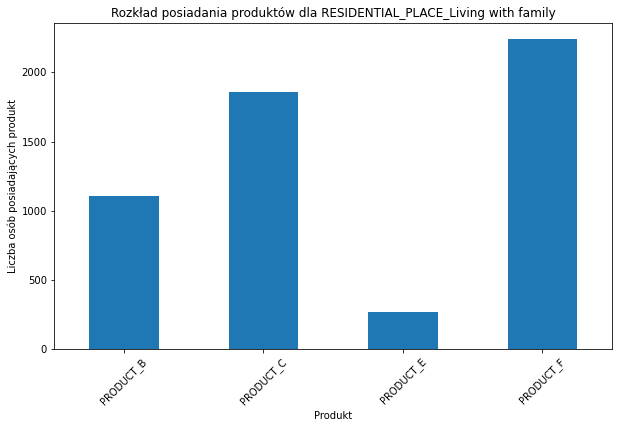

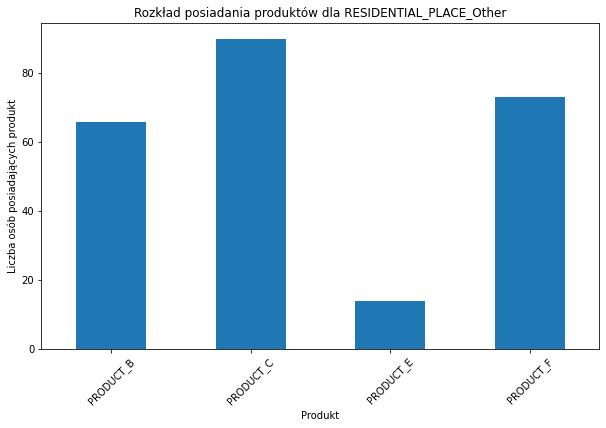

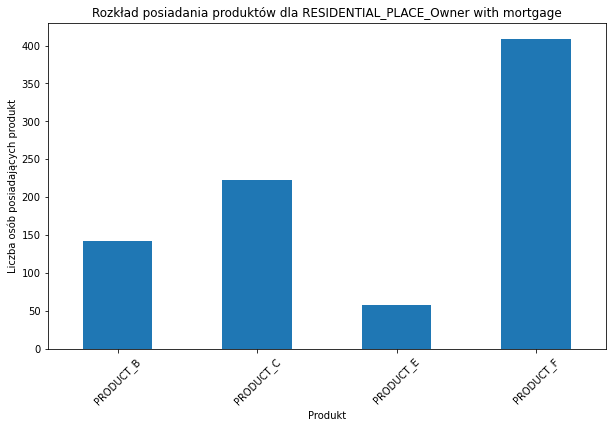

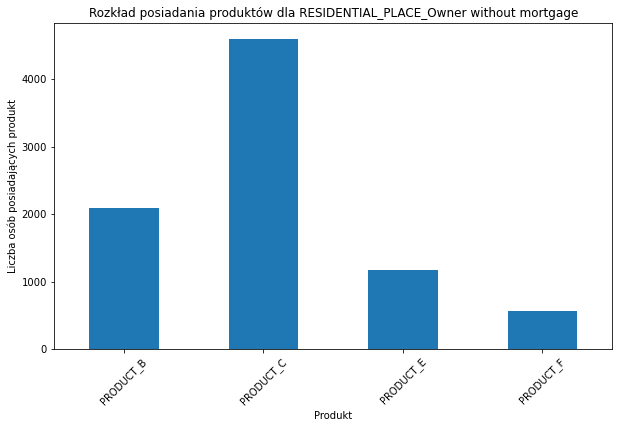

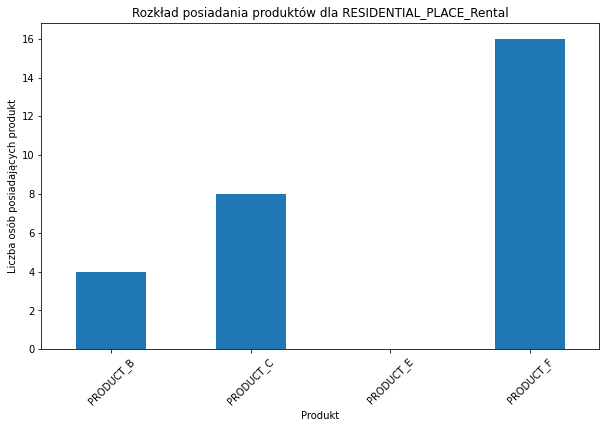

In [327]:
residential_columns = [
    'RESIDENTIAL_PLACE_Living with family', 
    'RESIDENTIAL_PLACE_Other', 
    'RESIDENTIAL_PLACE_Owner with mortgage', 
    'RESIDENTIAL_PLACE_Owner without mortgage', 
    'RESIDENTIAL_PLACE_Rental'
]

# Lista kolumn produktów
product_columns = ['PRODUCT_B', 'PRODUCT_C', 'PRODUCT_E', 'PRODUCT_F']

# Tworzymy wykresy dla każdej kolumny miejsca zamieszkania
for residential_column in residential_columns:
    df_filtered = data[data[residential_column] == 1]  # Filtrujemy tylko wiersze z wartością 1
    products_sum = df_filtered[product_columns].sum()  # Sumujemy posiadanie produktów
    
    # Tworzenie wykresu
    products_sum.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Rozkład posiadania produktów dla {residential_column}')
    plt.xlabel('Produkt')
    plt.ylabel('Liczba osób posiadających produkt')
    plt.xticks(rotation=45)
    plt.show()

Nothing interesting. Let's move to look for some other companies. I assume that the same business age, econic sector, and employee no is the same company

In [328]:
test2=orig_train.groupby(["BUSINESS AGE","ECONOMIC_SECTOR","EMPLOYEE_NO"]).agg('count')["PRODUCT"].reset_index()
test2[test2["PRODUCT"]>100]

,BUSINESS AGE,ECONOMIC_SECTOR,EMPLOYEE_NO,PRODUCT
1104,15,Manufacturing,> 1.000,121
1200,16,Manufacturing,> 1.000,110
1210,16,Missing,Missing,3337
1286,17,Manufacturing,> 1.000,127
1874,24,Water supply,between 501-1.000,113


In [329]:
data[(data['BUSINESS AGE']==16) & (data['ECONOMIC_SECTOR_Manufacturing'])]

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100,Age Group
39,42.0,0,1347.2500,9.0,16.0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40-50
41,35.0,0,1416.0000,13.0,16.0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-40
309,42.0,0,1466.0000,5.0,16.0,1,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50
314,49.0,1,1022.6000,11.0,16.0,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50
423,35.0,1,2200.0000,3.0,16.0,10,1,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,55.0,0,895.6600,8.0,16.0,14,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50-60
14702,36.0,1,980.6700,2.0,16.0,11,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30-40
14813,28.0,0,1032.0000,3.0,16.0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20-30
148

Length relationship with client is a column with the biggest correlation to finalized loan. I will categorize numbers in this column into the three bins: Short-term(0)- where relationship is between 0 and 5, Mid-Term(1)- where relationship is between 5 and 10, Long-Term(2) where relationship is over 10

In [330]:
data["LENGTH_RELATIONSHIP_WITH_CLIENT"].corr(data["FINALIZED_LOAN"])

0.5167700064485267

In [331]:
data['RELATIONSHIP_LENGTH_CAT'] = pd.cut(data['LENGTH_RELATIONSHIP_WITH_CLIENT'],
                                          bins=[0, 5, 10, float('inf')],
                                          labels=[0, 1, 2])
data["RELATIONSHIP_LENGTH_CAT"].corr(data["FINALIZED_LOAN"])

0.5047751306386103

It didn't change the correlation itself, but we will check if model is better with this column or not. Let's 

AI ACT!!! We see that person with age of 28 has worked for over 16 years. It is unacceptable and we have to delete it 

In [332]:
data=data[~((data['EMPLOYEE_NO_Missing']==1)& (data['ECONOMIC_SECTOR_Missing']==0))]

REAL FEATURE ENGINEERING STARTS HERE

In [333]:
data['INCOME_LOG'] = np.log1p(data['INCOME'])+1/10
data['INCOME_AGE_INTERACTION'] = (data['INCOME'] / (data['AGE']-21)) +1/10
data['INCOME_SENIORITY_INTERACTION'] = np.log1p(data['INCOME'] / data['WORK_SENIORITY'])+1/10
data['LOYALTY_TO_AGE']=data['LENGTH_RELATIONSHIP_WITH_CLIENT']/data['AGE']
data['CAREER_STABILITY_RATIO']=data['WORK_SENIORITY']/data['AGE']
data['SENIORITY_RELATIONSHIP_RATIO']=np.log1p(data['WORK_SENIORITY']/data['LENGTH_RELATIONSHIP_WITH_CLIENT'])+1/10
data['WORK_SENIORITY_TO_BUSINESS_AGE']= data['WORK_SENIORITY']/data['BUSINESS AGE']


categorical_column = ['Age Group']


# Inicjalizacja OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)


# Kodowanie One-Hot dla kolumn kategorycznych

encoded_data = encoder.fit_transform(data[categorical_column])


# Tworzenie DataFrame z zakodowanych danych

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_column))


# Połączenie zakodowanych danych z pozostałą częścią DataFrame, pomijając oryginalne kolumny kategoryczne

data = data.drop(categorical_column, axis=1).join(encoded_df)



C:\Users\jakub\AppData\Local\Temp\ipykernel_9700\2387845414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INCOME_LOG'] = np.log1p(data['INCOME'])+1/10
C:\Users\jakub\AppData\Local\Temp\ipykernel_9700\2387845414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INCOME_AGE_INTERACTION'] = (data['INCOME'] / (data['AGE']-21)) +1/10
C:\Users\jakub\AppData\Local\Temp\ipykernel_9700\2387845414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [336]:
# Usuwanie kolejnych kolumn które zostały przetransferowane

#data=data.drop(columns=['AGE','INCOME','WORK_SENIORITY','LENGTH_RELATIONSHIP_WITH_CLIENT'])

# Wyświetlenie pierwszych kilku wierszy przekształconych danych


#Usuwanie wiersza który ma wartości NaN
train_rows_with_nan = data.index[data.isnull().any(axis=1)].tolist() 
data=data.drop(train_rows_with_nan)
data

,AGE,HAS_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,PRODUCT_B,PRODUCT_C,PRODUCT_E,PRODUCT_F,AREA_County capital,AREA_Rural area,AREA_Urban area,RESIDENTIAL_PLACE_Living with family,RESIDENTIAL_PLACE_Other,RESIDENTIAL_PLACE_Owner with mortgage,RESIDENTIAL_PLACE_Owner without mortgage,RESIDENTIAL_PLACE_Rental,EDUCATION_College,EDUCATION_Highschool,EDUCATION_Middle school,EDUCATION_Missing,EDUCATION_Other,EDUCATION_Post secondary school,EDUCATION_Post-graduate,EDUCATION_Primary school,EDUCATION_University,EDUCATION_Vocational school,MARITAL_STATUS_divorced,MARITAL_STATUS_married,MARITAL_STATUS_single,MARITAL_STATUS_widow,ECONOMIC_SECTOR_Accommodation and food service activities,"ECONOMIC_SECTOR_Agriculture, hunting and forestry",ECONOMIC_SECTOR_Construction,ECONOMIC_SECTOR_Education,ECONOMIC_SECTOR_Electricity and gas,ECONOMIC_SECTOR_Financial and insurance activities,ECONOMIC_SECTOR_Human health and social work activities,ECONOMIC_SECTOR_Information and communication,ECONOMIC_SECTOR_Manufacturing,ECONOMIC_SECTOR_Mining and quarrying,ECONOMIC_SECTOR_Missing,ECONOMIC_SECTOR_Other,"ECONOMIC_SECTOR_Professional, scientific and technical activities",ECONOMIC_SECTOR_Public administration and defence,ECONOMIC_SECTOR_Real estate activities,ECONOMIC_SECTOR_Transportation and storage,ECONOMIC_SECTOR_Water supply,ECONOMIC_SECTOR_Wholesale and retail trade,EMPLOYEE_NO_> 1.000,EMPLOYEE_NO_Missing,EMPLOYEE_NO_between 0-10,EMPLOYEE_NO_between 101-250,EMPLOYEE_NO_between 11-20,EMPLOYEE_NO_between 21-50,EMPLOYEE_NO_between 251-500,EMPLOYEE_NO_between 501-1.000,EMPLOYEE_NO_between 51-100,RELATIONSHIP_LENGTH_CAT,INCOME_LOG,INCOME_AGE_INTERACTION,INCOME_SENIORITY_INTERACTION,LOYALTY_TO_AGE,CAREER_STABILITY_RATIO,SENIORITY_RELATIONSHIP_RATIO,WORK_SENIORITY_TO_BUSINESS_AGE,Age Group_20-30,Age Group_30-40,Age Group_40-50,Age Group_50-60,Age Group_60+
0,65.0,0,1245.00,5.0,16.0,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.227694,28.395455,5.621461,0.015385,0.076923,1.891759,0.312500,0.0,0.0,0.0,0.0,1.0
1,64.0,0,1380.00,5.0,16.0,8,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.330563,32.193023,5.724018,0.125000,0.078125,0.585508,0.312500,0.0,0.0,0.0,0.0,1.0
2,30.0,0,1131.00,2.0,6.0,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.131741,125.766667,6.439477,0.033333,0.066667,1.198612,0.333333,0.0,1.0,0.0,0.0,0.0
3,39.0,0,1730.00,9.0,13.0,2,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,7.556455,96.211111,5.363841,0.051282,0.230769,1.804748,0.692308,0.0,1.0,0.0,0.0,0.0
4,38.0,0,1189.00,5.0,16.0,1,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.181709,70.041176,5.575626,0.026316,0.131579,1.891759,0.312500,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003,60.0,0,2015.17,20.0,20.0,9,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.

In [337]:
data.to_csv('valid_set_test_1.csv',index=False)